Imports:

In [3]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Code copied from 'load_covasim_data_drums' function from the DataFormatter.py file:
(function has been edited to fit my purposes of playing with the graphs)

In [58]:
#loading the list of dataframes and turning it into a list of matricies 
def df_to_mat(file_path, population, case_name, keep_d=True, plot=True):
    file_name = 'covasim_' + str(case_name)
    params = joblib.load(file_path + file_name + '.joblib')
    data = params['data']
    matrix_list = [df.values for df in data]
    matrix3d = np.array(matrix_list)
    mean_mat = np.mean(matrix3d, axis = 0)
    max_mat = np.max(matrix3d, axis = 0)
    min_mat = np.min(matrix3d, axis = 0)

    return([mean_mat, max_mat, min_mat])

Running the above code:

In [59]:
mat_list = df_to_mat("//Users//jordanklein22//Documents//GitHub//COVASIM_EQL_BINNS//Data//covasim_data//drums_data//", 50000, "50000_0.1_0.3_dynamic_piecewise_1000")
mean_mat = mat_list[0]
max_mat = mat_list[1]
min_mat = mat_list[2]

The plotting part:

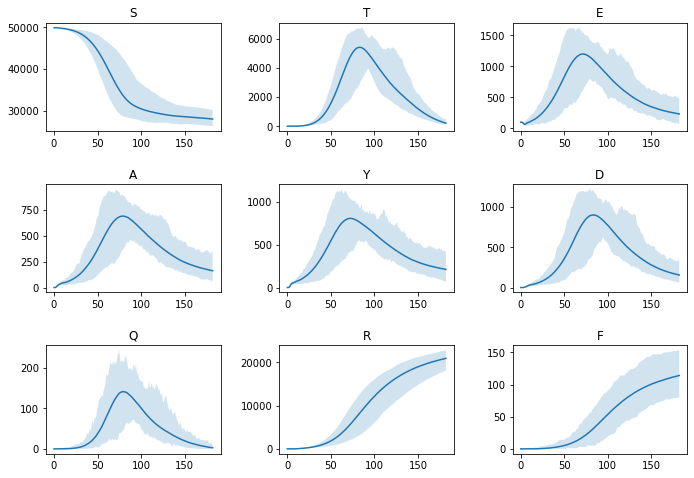

In [68]:
num_days= mean_mat.shape[0] #num rows in matrix
days = range(num_days)
num_cols = mean_mat.shape[1]
col_name = ["S", "T", "E", "A", "Y", "D", "Q", "R", "F"]
fig = plt.figure(figsize=(10, 7))
for i in range(num_cols):    
    ax = fig.add_subplot(3, 3, i+1) #subplot with n divided by 3 and rounded up num rows, 3 num cols and the element goes in the ith place
    ax.plot(days, mean_mat[:,i])
    ax.fill_between(days, max_mat[:,i], min_mat[:,i], alpha=0.2, label='Error')
    ax.set_title(col_name[i])
    
    
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.tight_layout(pad=2)
#plt.savefig(file_path + file_name + '.png')
#plt.close()
plt.show()